# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [2]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=188.58546167136026, mobile=True), User(purchased=False, time_on_site=288.18602588522344, mobile=True), User(purchased=False, time_on_site=142.562913042863, mobile=True), User(purchased=False, time_on_site=92.55255627230314, mobile=True), User(purchased=False, time_on_site=52.11470913660016, mobile=True), User(purchased=True, time_on_site=153.5420985510959, mobile=True), User(purchased=False, time_on_site=281.5837352107538, mobile=False), User(purchased=False, time_on_site=117.75946417424062, mobile=True), User(purchased=False, time_on_site=108.9026573368056, mobile=True), User(purchased=True, time_on_site=26.919905087557602, mobile=True)]


In [5]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,188.585462,True
1,False,288.186026,True
2,False,142.562913,True
3,False,92.552556,True
4,False,52.114709,True


In [6]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.24789009856332,6.7033821915598395,6.881177358245394,7.200991546478237,7.495885416736784,7.72315133190817,8.313887975291374,9.675723576926984,10.564512738971008,11.040999920206353,...,572.3277078851107,573.8350785673186,578.0849361731678,578.9139424219062,581.3477454558372,583.2145321074403,584.8093133329038,587.8518531397508,591.5374153636365,598.5255455346785
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,0,1,0,0,1,1,...,0,0,1,1,0,1,0,0,0,0
True,0,1,0,0,1,0,1,1,0,0,...,1,1,0,0,1,0,1,1,1,1


In [7]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

TypeError: ignored

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [1]:
!pip install pandas==0.23.4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
per = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv')

In [5]:
per.shape


(1200, 4)

In [6]:
per.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
per = per.drop('Unnamed: 0', axis=1)

In [8]:
per.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [9]:
per.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


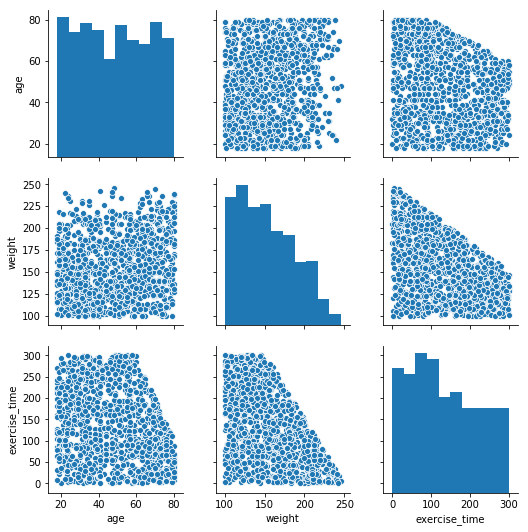

In [10]:
sns.pairplot(per)

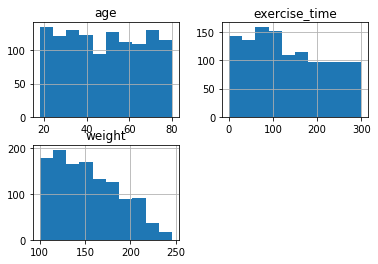

In [11]:
per.hist();

In [0]:
extime_bins = pd.cut(per['exercise_time'], 6)  
weight_bins = pd.cut(per['weight'], 6)
age_bins = pd.cut(per['age'], 6)


In [13]:
pd.crosstab(weight_bins, extime_bins)

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
"(99.854, 124.333]",34,42,51,51,46,70
"(124.333, 148.667]",37,47,27,62,63,68
"(148.667, 173.0]",37,63,49,44,42,18
"(173.0, 197.333]",47,45,41,31,4,0
"(197.333, 221.667]",52,62,26,2,0,0
"(221.667, 246.0]",34,5,0,0,0,0


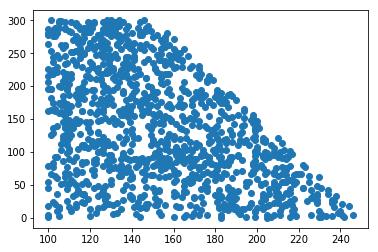

In [14]:
plt.scatter(per['weight'],per['exercise_time'])


In [15]:
pd.crosstab(weight_bins,age_bins)

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
weight,,,,,,
"(99.854, 124.333]",56,70,49,50,30,39
"(124.333, 148.667]",57,49,64,50,48,36
"(148.667, 173.0]",48,44,39,33,44,45
"(173.0, 197.333]",23,28,22,28,32,35
"(197.333, 221.667]",20,22,21,22,29,28
"(221.667, 246.0]",5,4,5,1,9,15


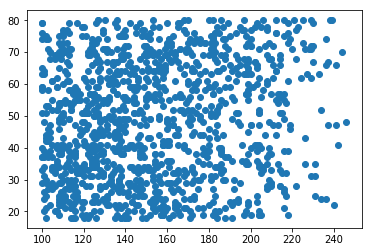

In [16]:
plt.scatter(per['weight'],per['age'])

In [17]:
pd.crosstab(age_bins, extime_bins)

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
age,,,,,,
"(17.938, 28.333]",29,35,33,45,39,28
"(28.333, 38.667]",48,32,29,42,34,32
"(38.667, 49.0]",27,40,25,26,36,46
"(49.0, 59.333]",26,30,29,29,24,46
"(59.333, 69.667]",44,53,33,36,22,4
"(69.667, 80.0]",67,74,45,12,0,0


In [18]:
pd.crosstab(weight_bins, [age_bins, extime_bins])

age                (17.938, 28.333]                               \
exercise_time          (-0.3, 50.0] (50.0, 100.0] (100.0, 150.0]   
weight                                                             
(99.854, 124.333]                 4             4             10   
(124.333, 148.667]                5             8              5   
(148.667, 173.0]                  2             8              8   
(173.0, 197.333]                  7             6              6   
(197.333, 221.667]                6             9              4   
(221.667, 246.0]                  5             0              0   

age                                                              \
exercise_time      (150.0, 200.0] (200.0, 250.0] (250.0, 300.0]   
weight                                                            
(99.854, 124.333]              12             10             16   
(124.333, 148.667]             14             14             11   
(148.667, 173.0]               14             15              1   
(173.0, 197.333]                4              0              0   
(197.333, 221.667]              1              0              0   
(221.667, 246.0]                0              0              0   

age                (28.333, 38.667]                               \
exercise_time          (-0.3, 50.0] (50.0, 100.0] (100.0, 150.0]   
weight                                                             
(99.854, 124.333]                 7            12             10   
(124.333, 148.667]                6             5              2   
(148.667, 173.0]                 11             4              7   
(173.0, 197.333]                  7             6              7   
(197.333, 221.667]               13             5              3   
(221.667, 246.0]                  4             0              0   

age                                    ...       (59.333, 69.667]  \
exercise_time      (150.0, 200.0]      ...           (-0.3, 50.0]   
weight                                 ...                          
(99.854, 124.333]              16      ...                      4   
(124.333, 148.667]              9      ...                      5   
(148.667, 173.0]                8      ...                      7   
(173.0, 197.333]                8      ...                      7   
(197.333, 221.667]              1      ...                     12   
(221.667, 246.0]                0      ...                      9   

age                                                                            \
exercise_time      (50.0, 100.0] (100.0, 150.0] (150.0, 200.0] (200.0, 250.0]   
weight                                                                          
(99.854, 124.333]              8              6              6              5   
(124.333, 148.667]             8              7             16             10   
(148.667, 173.0]              14              8              7              7   
(173.0, 197.333]              10              8              7              0   
(197.333, 221.667]            13              4              0              0   
(221.667, 246.0]               0              0              0              0   

age                               (69.667, 80.0]                               \
exercise_time      (250.0, 300.0]   (-0.3, 50.0] (50.0, 100.0] (100.0, 150.0]   
weight                                                                          
(99.854, 124.333]               1             11            10             14   
(124.333, 148.667]              2             13            15              5   
(148.667, 173.0]                1             12            18             10   
(173.0, 197.333]                0             11            12             12   
(197.333, 221.667]              0             10            14              4   
(221.667, 246.0]                0             10             5              0   

age                                
exercise_time      (150.0, 200.0]  
weight          

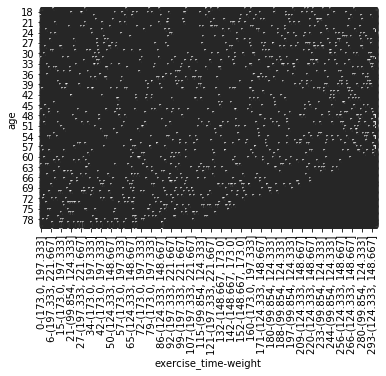

In [19]:
sns.heatmap(pd.crosstab(per['age'],  [per['exercise_time'], weight_bins] ),
            cmap="YlGnBu", annot=True, cbar=False);

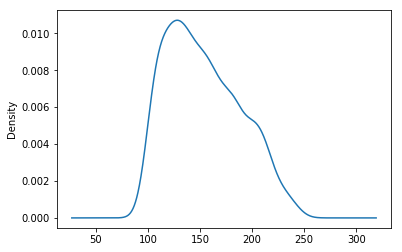

In [20]:
per['weight'].plot.density();

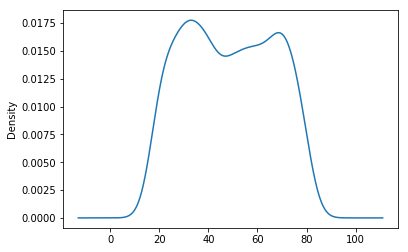

In [21]:
per['age'].plot.density();

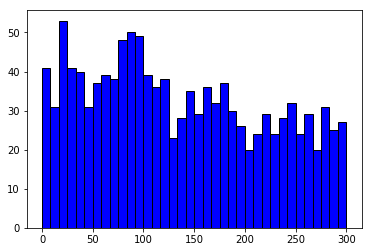

In [32]:
plt.hist(per['exercise_time'], color = 'blue', edgecolor = 'black',
         bins = int(180/5));


TypeError: ignored

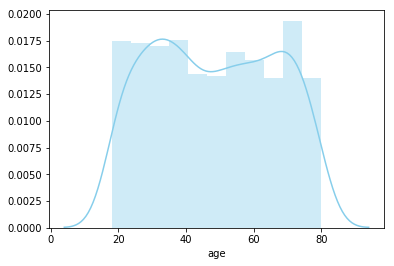

In [39]:

sns.distplot( per["age"] , color="skyblue", )
sns.distplot( per["weight"] , color="red", axis=0)
sns.distplot( per["exercise_time"] , color="gold");




In [0]:
#ax = plt.axes(projection='3d')

from mpl_toolkits.mplot3d import Axes3D
# Data for three-dimensional scattered points


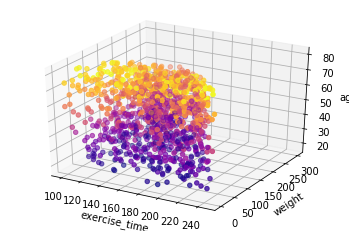

In [30]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zdata = per['age']
xdata = per['weight']
ydata = per['exercise_time']
ax.set_xlabel('exercise_time')
ax.set_ylabel('weight')
ax.set_zlabel('age')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma');


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
All are continuous variables, except the Unnamed:0.

2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)